In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

## Dataset Key Information.¶
Loan_ID--------------> Unique Loan ID.\
Gender --------------> Male/ Female\
Married --------------> Applicant married (Y/N)\
Dependents ------------> Number of dependents\
Education -------------> Applicant Education (Graduate/ Under Graduate)\
Self_Employed ---------> Self-employed (Y/N)\
ApplicantIncome -------> Applicant income\
CoapplicantIncome -----> Coapplicant income\
LoanAmount -----------> Loan amount in thousands\
Loan_Amount_Term ------> Term of a loan in months\
Credit_History --------> Credit history meets guidelines\
Property_Area ---------> Urban/ Semi-Urban/ Rural\
Loan_Status -----------> Loan approved (Y/N)\

In [ ]:
train_data = pd.read_csv("loan-train.csv")
test_data = pd.read_csv("loan-test.csv")

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
print("Shape : ", train_data.shape)

Shape :  (614, 13)


<Axes: >

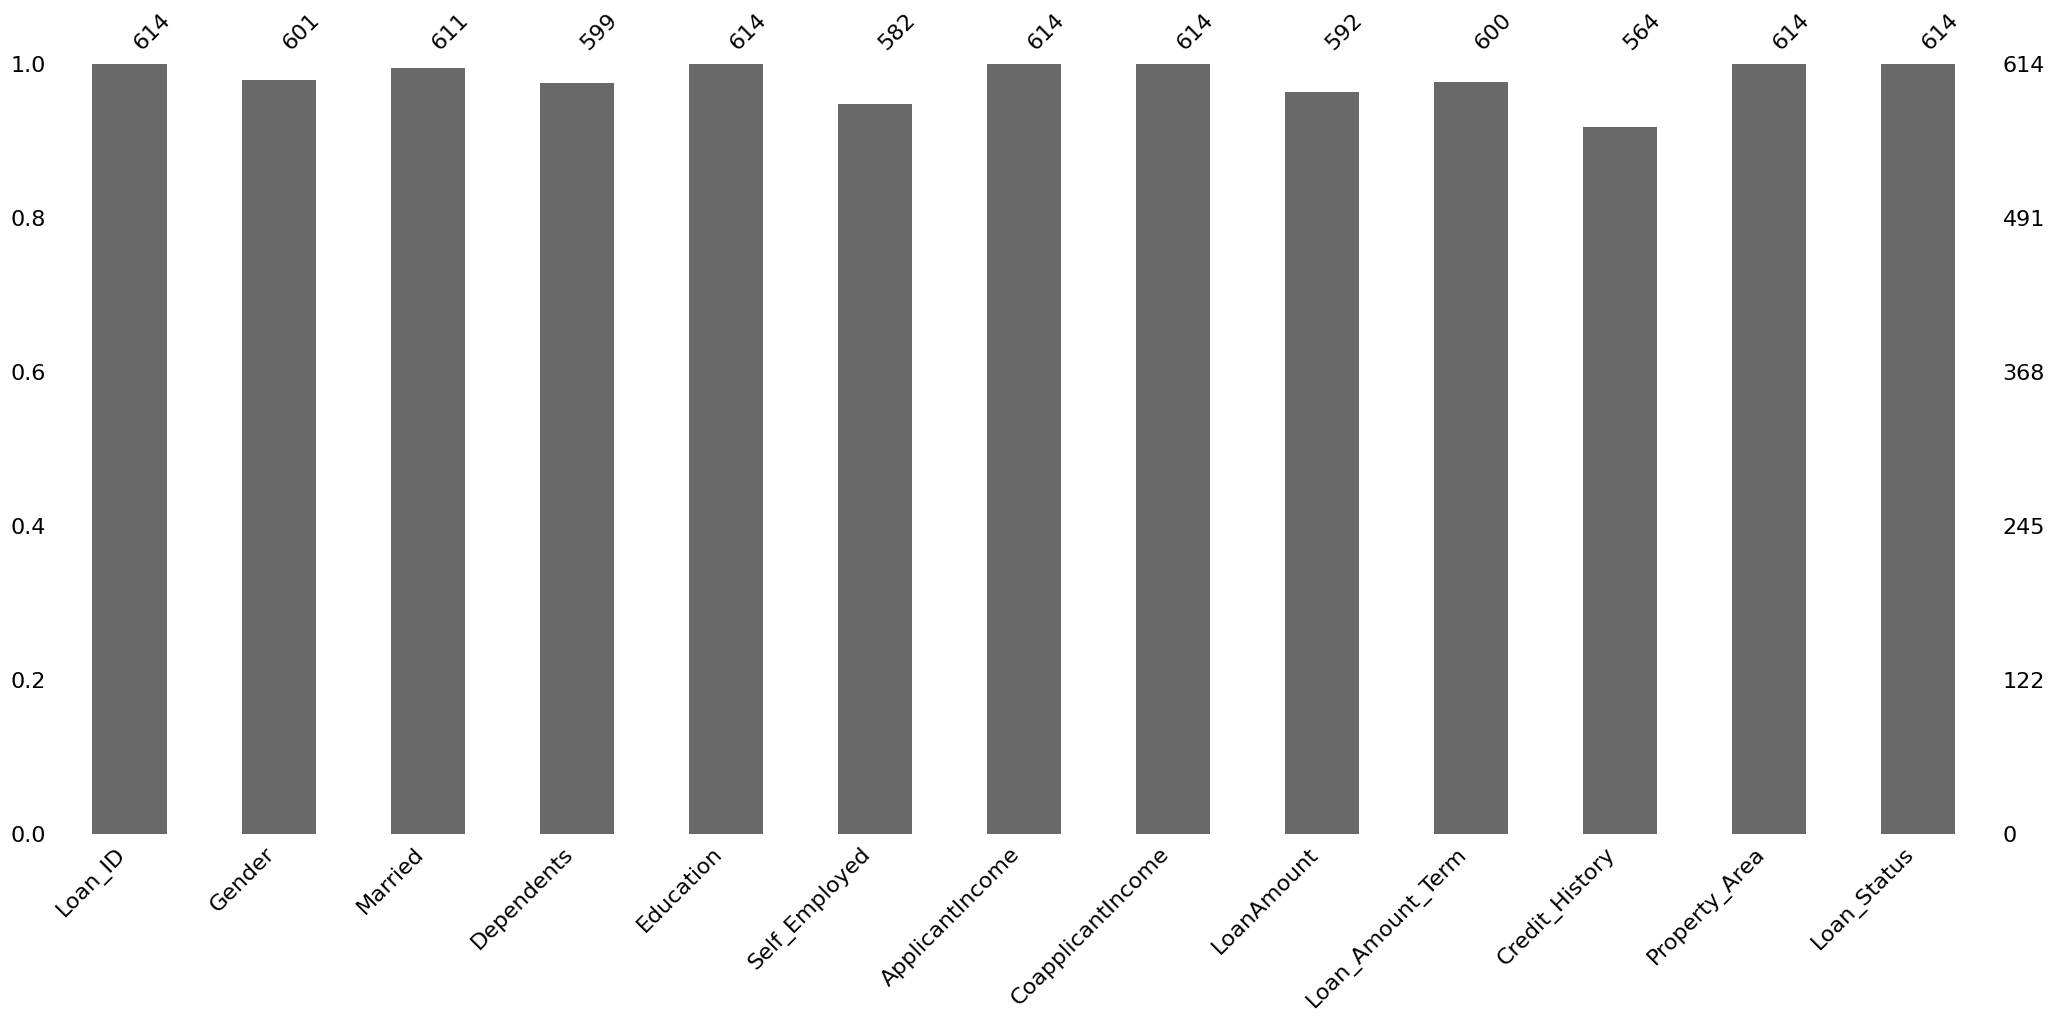

In [ ]:
msno.bar(train_data)

In [ ]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that the maximum number of null values is in the Credit history column (50 null values) , and most of the features do not have too many null values.

<Axes: >

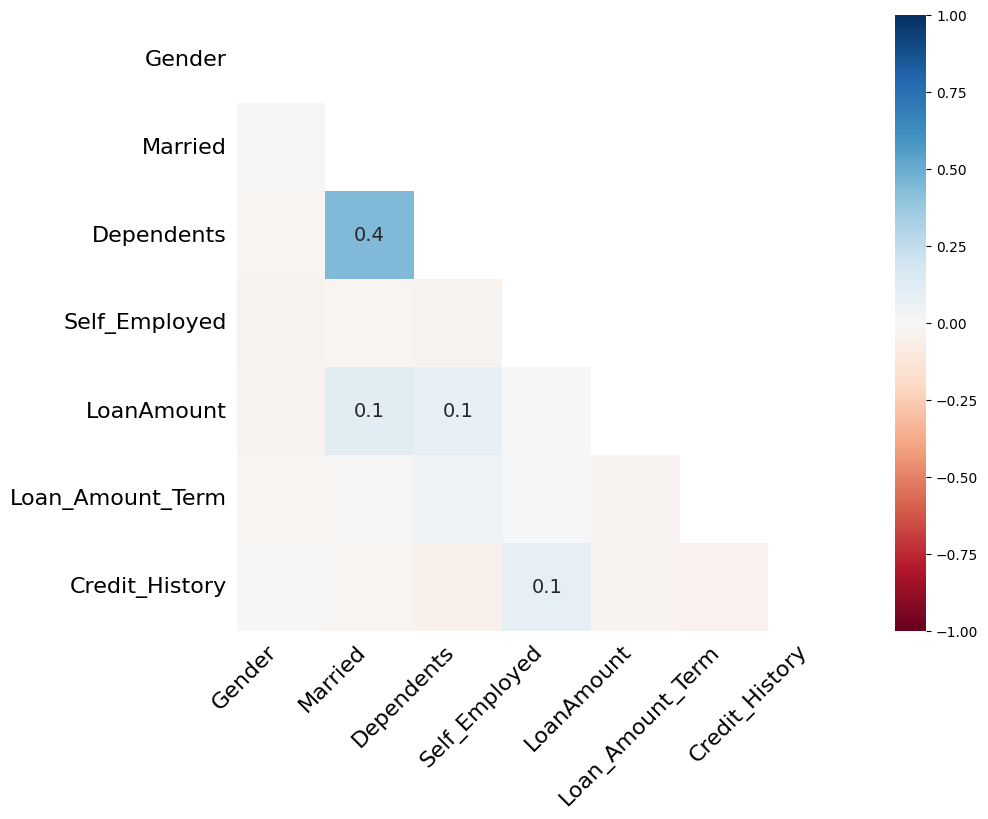

In [ ]:
# heatmap to see correlations of missingness between features
msno.heatmap(train_data, figsize=(10, 8))

- There's a noticeable positive correlation (around 0.4) between Dependents and Married. This could indicate that when data on whether an applicant is married is missing, there's also a higher likelihood that the number of dependents is missing.\
- There are smaller correlations (around 0.1) between LoanAmount and both Loan_Amount_Term and Credit_History. This means there's a slightly higher chance that when LoanAmount is missing, Loan_Amount_Term and Credit_History may also be missing, but the relationship is not very strong.
- Most of the squares are light, indicating there's generally a weak relationship in the pattern of missingness between most of the features.

# Basic EDA

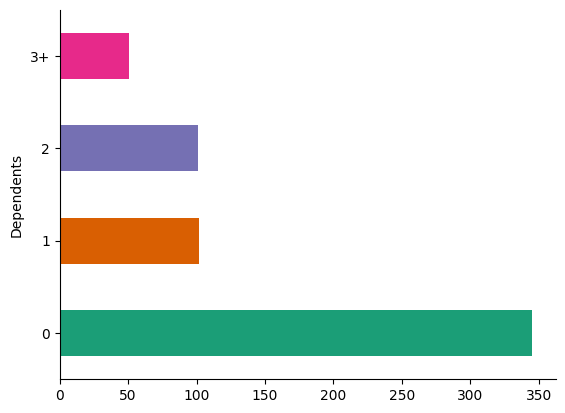

In [ ]:
# @title Dependents

train_data.groupby('Dependents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

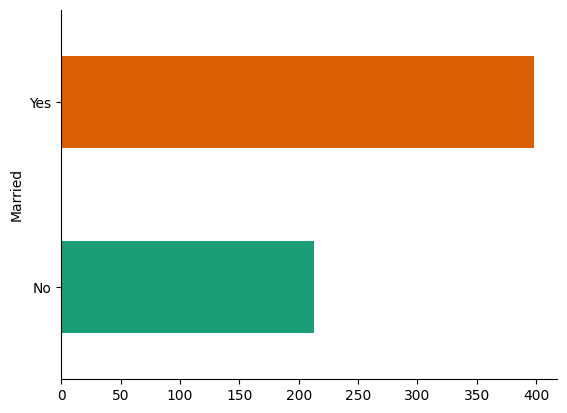

In [ ]:
# @title Married

train_data.groupby('Married').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

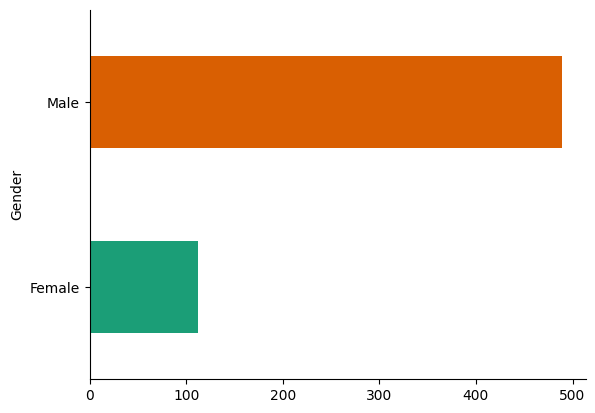

In [ ]:
# @title Gender

train_data.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

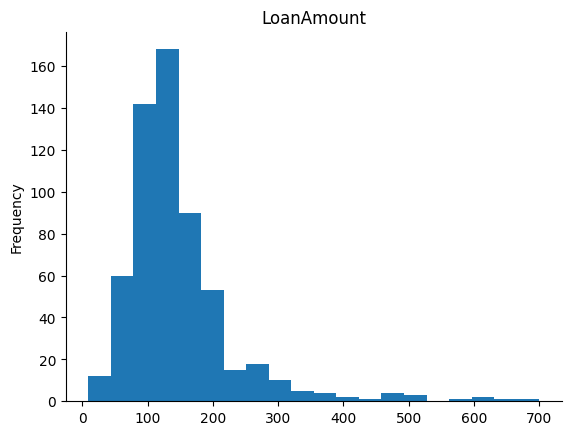

In [ ]:
# @title LoanAmount

train_data['LoanAmount'].plot(kind='hist', bins=20, title='LoanAmount')
plt.gca().spines[['top', 'right',]].set_visible(False)

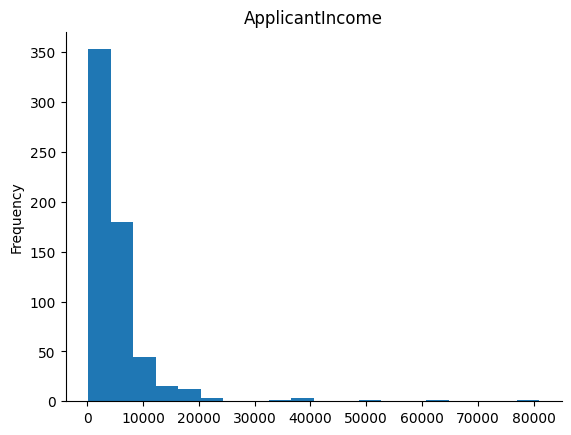

In [ ]:
# @title ApplicantIncome

train_data['ApplicantIncome'].plot(kind='hist', bins=20, title='ApplicantIncome')
plt.gca().spines[['top', 'right',]].set_visible(False)

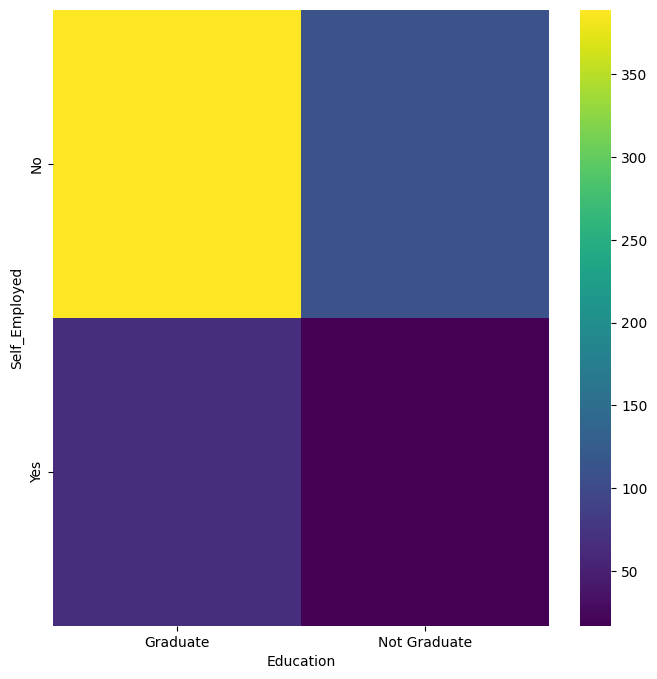

In [ ]:
# @title Education vs Self_Employed

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Self_Employed'].value_counts()
    for x_label, grp in train_data.groupby('Education')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Education')
_ = plt.ylabel('Self_Employed')

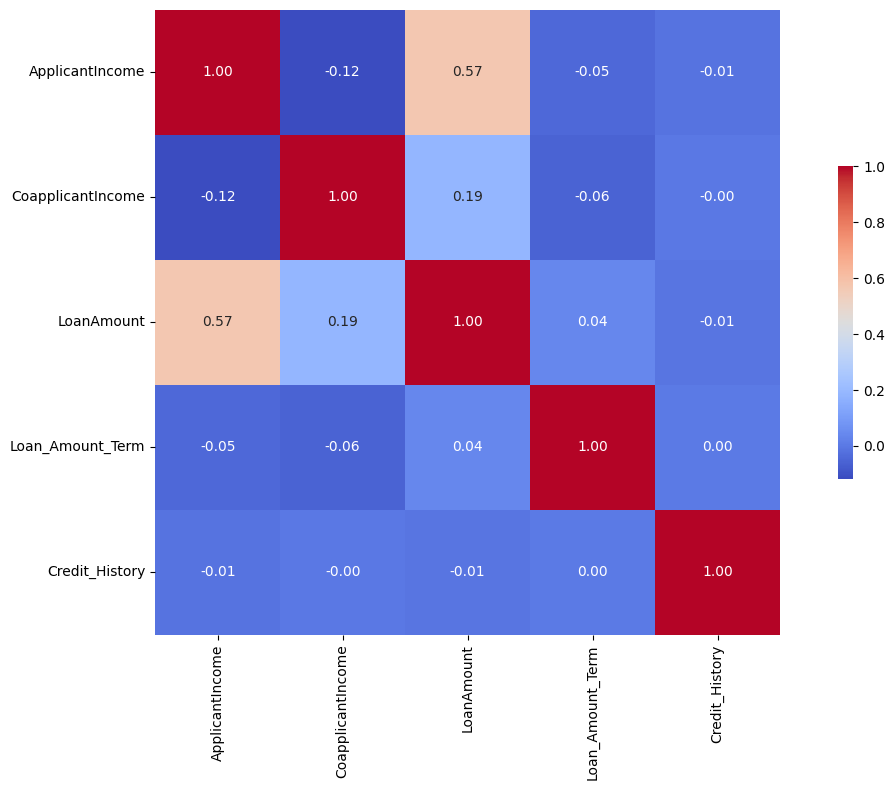

In [ ]:
# let us check the correlations within thia dataset to see if there are any patterns that stick out
numeric_data = train_data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': .5})

# Adjust the plot to make sure it's not cut off
plt.tight_layout()
plt.show()

- ApplicantIncome and LoanAmount:
There's a moderately positive correlation (0.57), which suggests that as the applicant's income increases, the loan amount tends to increase as well. This is a logical association as those with higher incomes might be capable of repaying larger loans.

- CoapplicantIncome and LoanAmount:
There's a weaker positive correlation (0.19) here compared to ApplicantIncome. This might indicate that coapplicant income has some influence on the loan amount, but not as strongly as the main applicant's income.

- ApplicantIncome and CoapplicantIncome:
The correlation is slightly negative (-0.12), implying that generally, when the applicant's income is high, the coapplicant's income might not be, and vice versa. This could be because higher applicant income reduces the necessity for a coapplicant with a high income, or it could be a pattern specific to this dataset.

- Loan_Amount_Term:
It shows very little to no correlation with other features, the highest being with LoanAmount (0.04). The term of the loan seems largely independent of the incomes and the loan amount.

- Credit_History:
There is essentially no correlation between Credit_History and any other feature, with all coefficients around -0.01 to 0.00. This suggests that credit history does not vary systematically with income levels, loan amount, or loan term in this dataset.

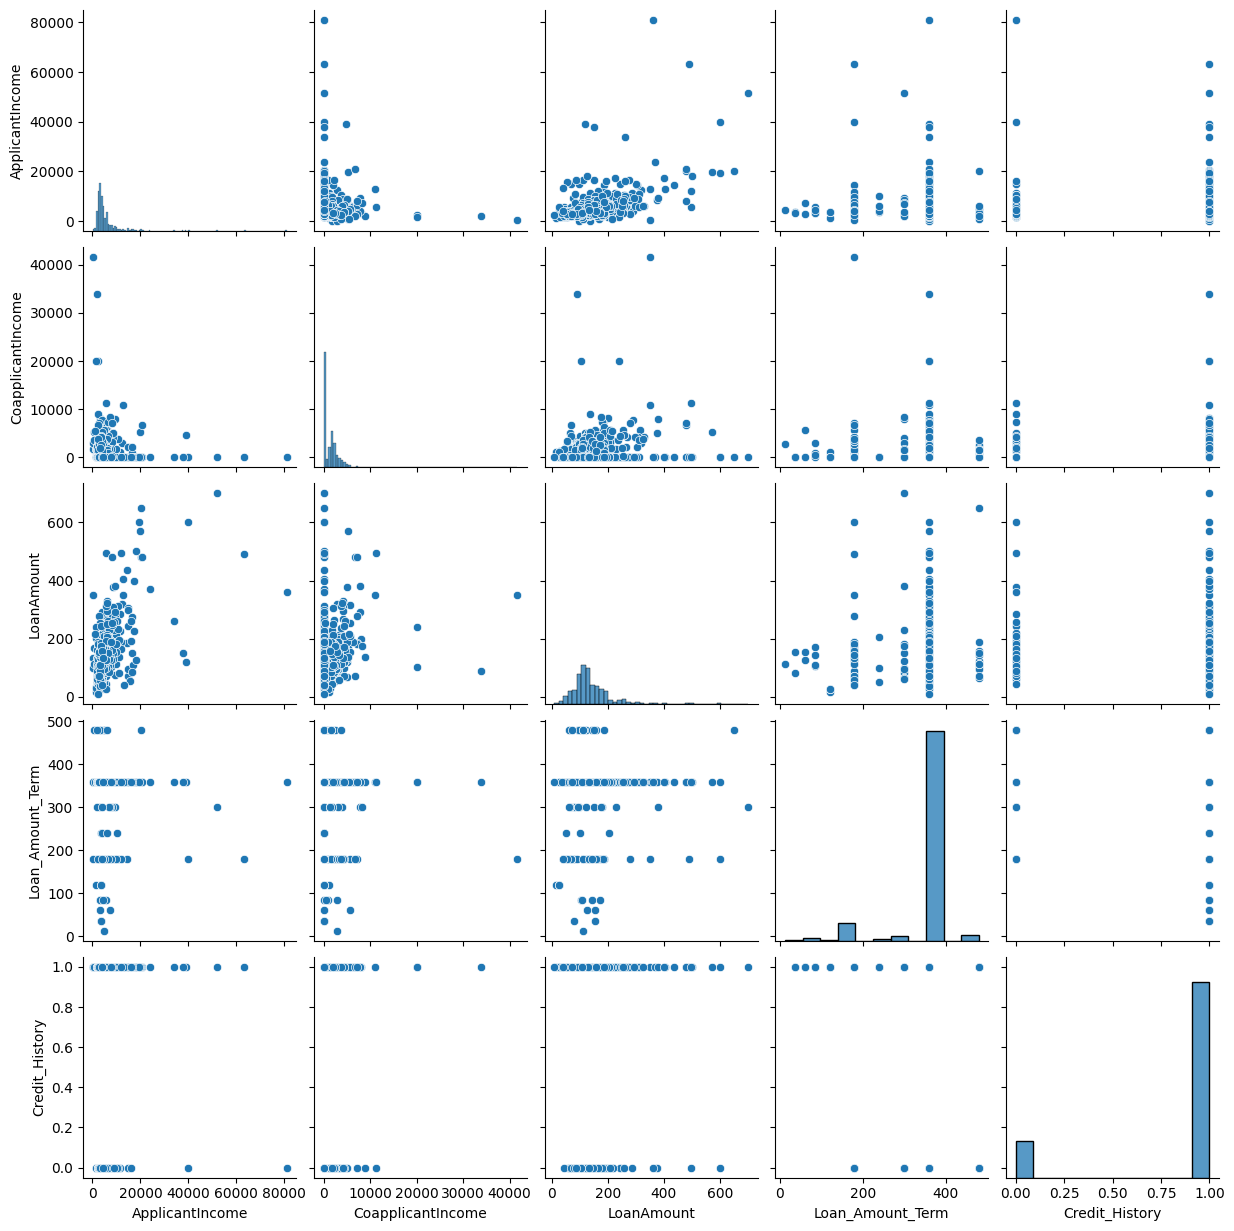

In [ ]:
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(train_data[numeric_cols])
plt.show()

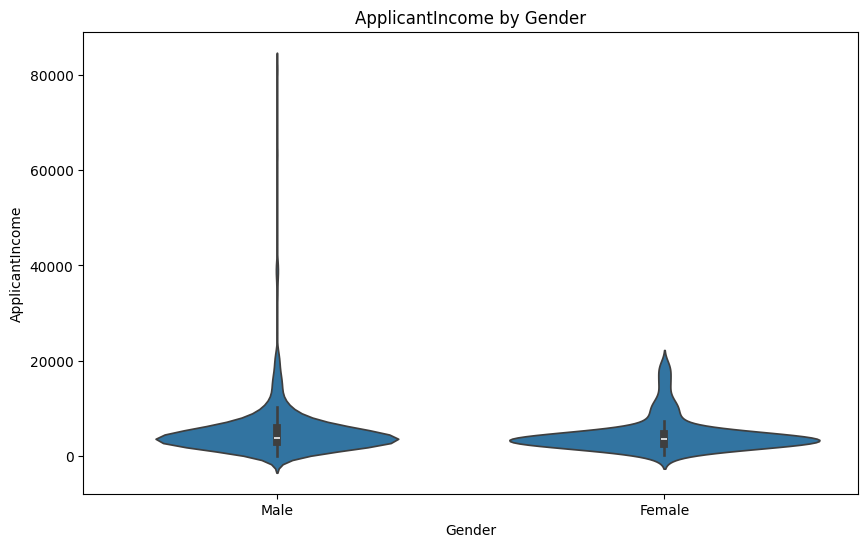

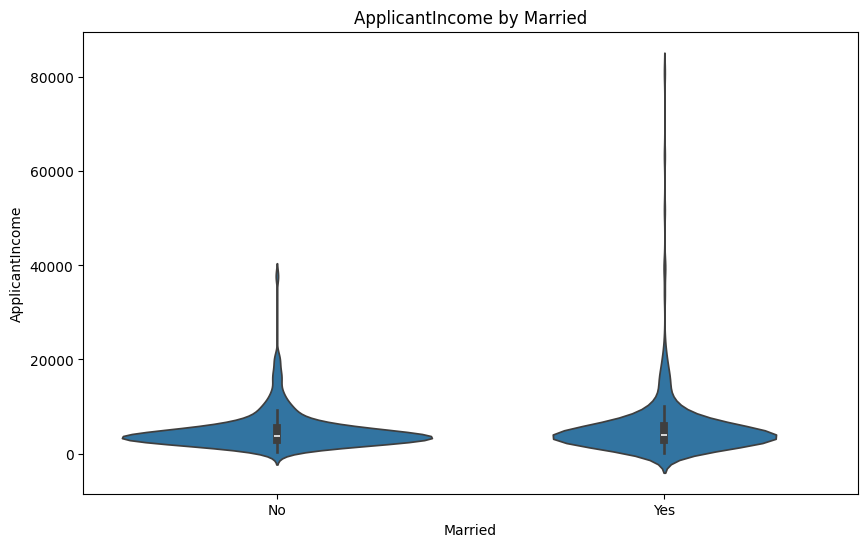

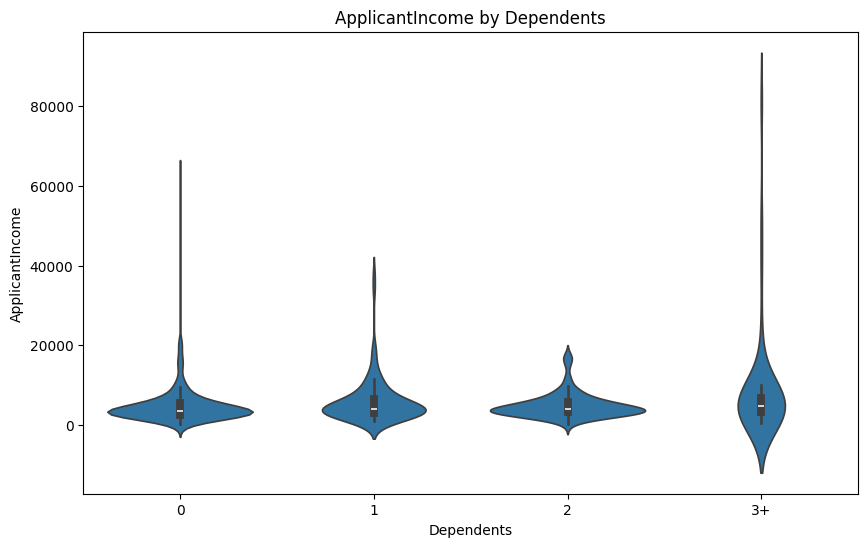

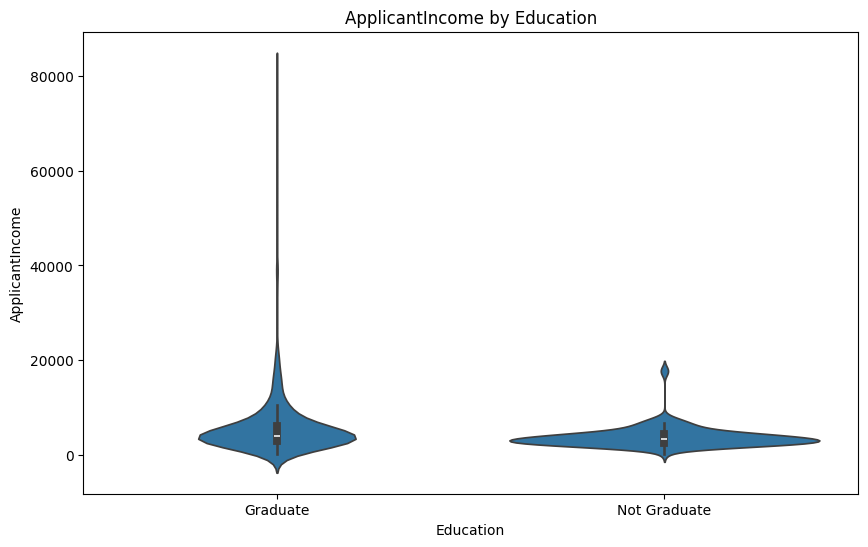

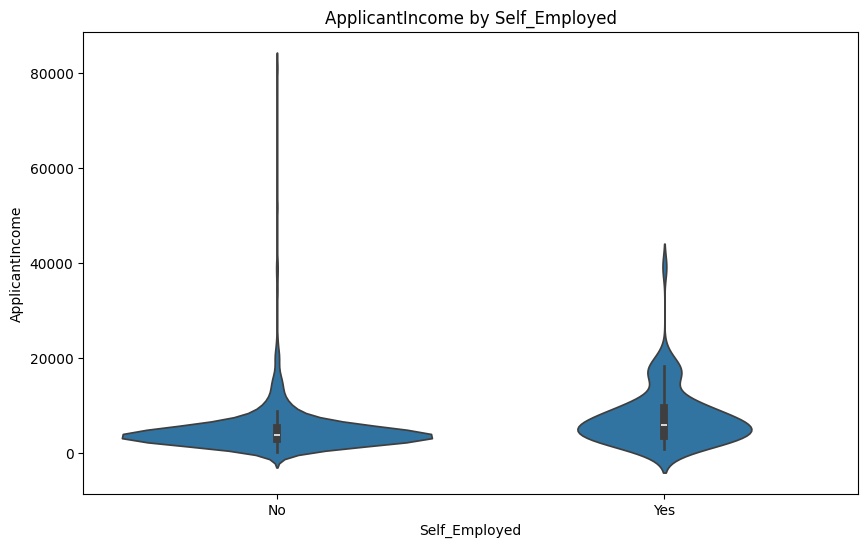

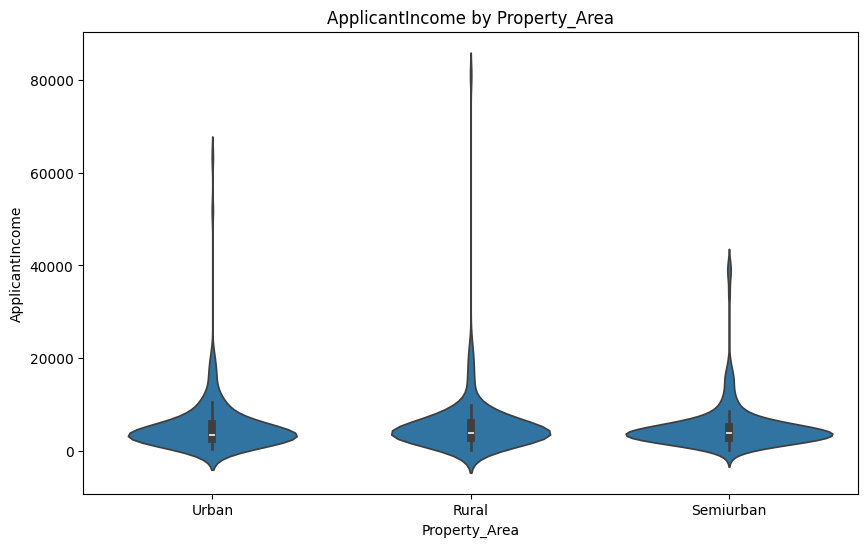

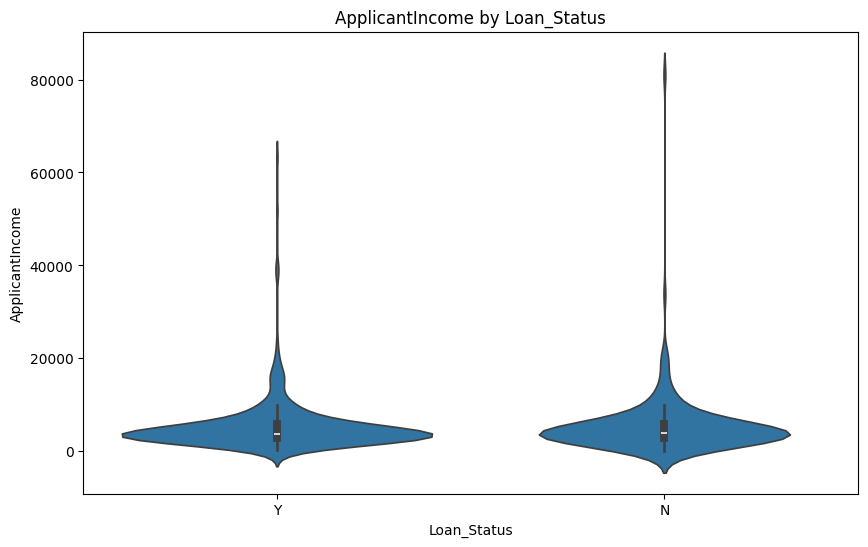

In [ ]:
categorical_cols = train_data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col != 'Loan_ID':  # Exclude ID columns or any other non-relevant categorical columns
        plt.figure(figsize=(10, 6))
        sns.violinplot(x=col, y='ApplicantIncome', data=train_data)
        plt.title(f'ApplicantIncome by {col}')
        plt.show()

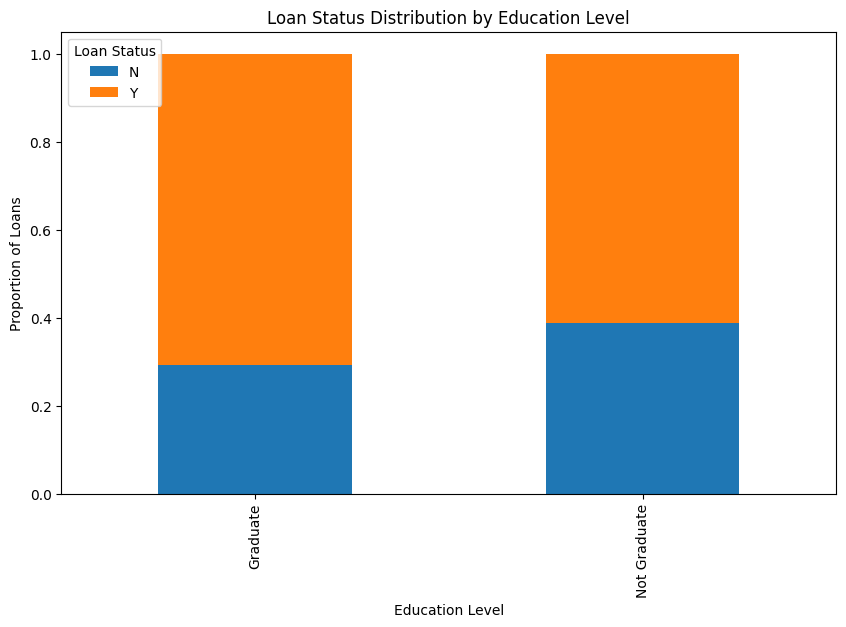

In [ ]:
ct = pd.crosstab(train_data['Education'], train_data['Loan_Status'], normalize='index')

ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Status Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Loans')
plt.legend(title='Loan Status', loc='upper left')
plt.show()